In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:,[1,2,3]].values
y = data.iloc[:,-1].values

In [3]:
x[:10]

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ['Female', 27, 57000],
       ['Male', 19, 76000],
       ['Male', 27, 58000],
       ['Female', 27, 84000],
       ['Female', 32, 150000],
       ['Male', 25, 33000],
       ['Female', 35, 65000]], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:5]

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000]], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [9]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

accuracy =  0.95


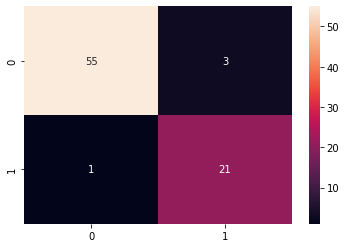

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)
print("accuracy = ",ac)
sns.heatmap(cm,annot=True)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [12]:
model = Sequential()
model.add(Dense(8,input_dim=3,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
32/32 [==============================] - 1s 1ms/step - loss: 0.7334 - accuracy: 0.5031
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5656
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6531
Epoch 4/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.7156
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7719
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7937
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8000
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8094
Epoch 9/150
32/32 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8125
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8281
Epoch 11/

In [15]:
# import pickle
# pickle.dump(model, open('models.pkl','wb'))

INFO:tensorflow:Assets written to: ram://680c9bc4-85b4-4d49-aab0-4784fb6414e0/assets


In [16]:
error,accuracy = model.evaluate(x_test,y_test)
accuracy

3/3 [==============================] - 0s 8ms/step - loss: 0.1654 - accuracy: 0.9500


0.949999988079071

In [17]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
ac = accuracy_score(y_test,y_pred)
print("accuracy = ",ac)

accuracy =  0.95


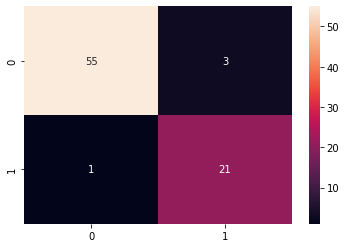

In [19]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [20]:
precision = precision_score(y_test,y_pred)
precision

0.875

In [21]:
recall = recall_score(y_test,y_pred)
recall

0.9545454545454546

In [22]:
# from google.colab import files
# files.download('models.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>